In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

# 샘플 이미지 로딩
one_image = load_sample_image("china.jpg")

# 이미지의 차원
print(one_image.shape)  # 4096 (64x64)

(427, 640, 3)


([], [])

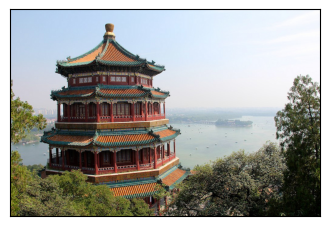

In [2]:
# 이미지 → 픽셀 1개를 변수 1개로
# 전체 이미지

plt.figure(figsize=(4, 4))
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [3]:
# 부분 이미지 리스트
# (100,150) patch size

patches = image.extract_patches_2d(one_image, (100, 150))
print(patches.shape)

(161048, 100, 150, 3)


([], [])

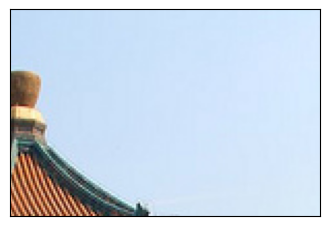

In [4]:
# 부분 이미지

plt.figure(figsize=(4, 4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [5]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

In [6]:
faces.data.shape

(400, 4096)

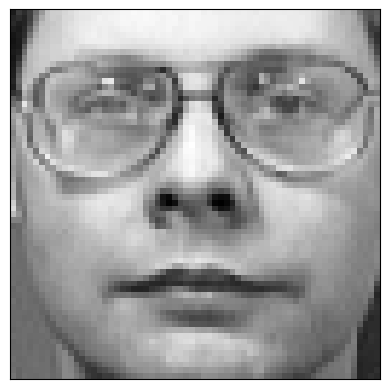

In [7]:
plt.imshow(faces.data[30].reshape(64, 64), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
# 미니배치 사이즈 기본값 1024
kmeans = MiniBatchKMeans(n_clusters=81, random_state=0, verbose=True)

# 부분 이미지의 사이즈
patch_size = (20, 20)

buffer = []
t0 = time.time()

# 400장의 이미지를 6회 반복 : 2400
index = 0
for _ in range(6):  # 전체 데이터를 6회 반복
    for img in faces.images:  # 400장의 이미지
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=0)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            # 버퍼에 누적
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("부분학습 : %4i/%i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("실행시간: ", dt)

[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 6 cluster centers.
부분학습 :  100/2400
부분학습 :  200/2400
[MiniBatchKMeans] Reassigning 2 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분학습 :  300/2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분학습 :  400/2400
부분학습 :  500/2400
부분학습 :  600/2400
부분학습 :  700/2400
부분학습 :  800/2400
부분학습 :  900/2400
부분학습 : 1000/2400
부분학습 : 1100/2400
부분학습 : 1200/2400
부분학습 : 1300/2400
부분학습 : 1400/2400
부분학습 : 1500/2400
부분학습 : 1600/2400
부분학습 : 1700/2400
부분학습 : 1800/2400
부분학습 : 1900/2400
부분학습 : 2000/2400
부분학습 : 2100/2400
부분학습 : 2200/2400
부분학습 : 2300/2400
부분학습 : 2400/2400
실행시간:  2.437627077102661


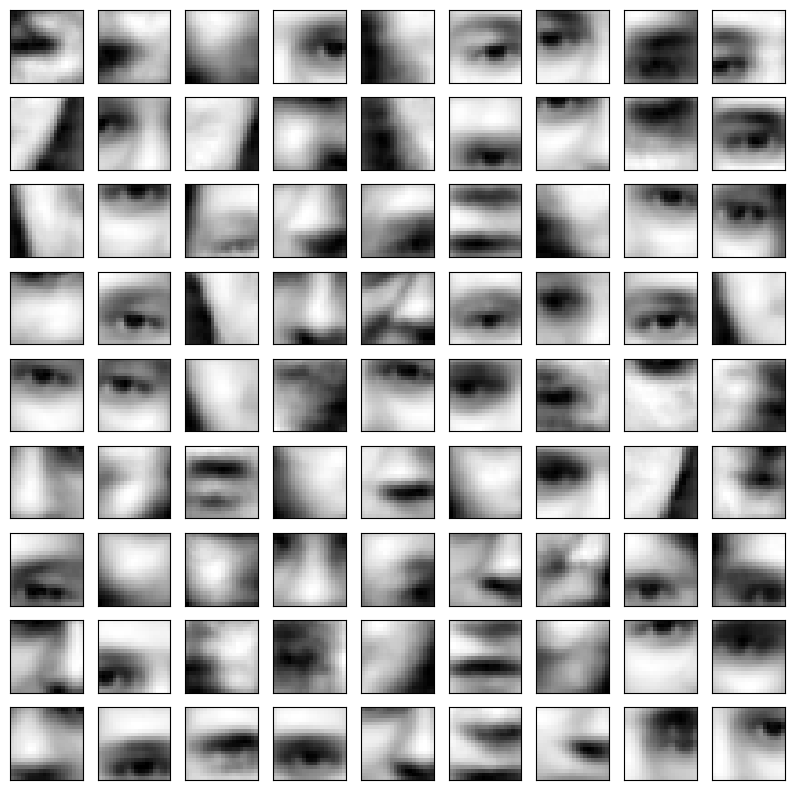

In [9]:
plt.figure(figsize=(10, 10))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()